In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [2]:
from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# create an Observables object to store information for derivatives

pars = np.array( ['omega_b', 'omega_cdm', 'h',  'A_s', 'n_s', 'tau_reio'])
centers = np.array([0.02222,  0.1197,  0.69,  2.1955e-9, 0.9655, 0.06])
steps = np.array([0.0001,     0.001,    0.01,   0.01e-9, 0.005, 0.02])

obs = Observables(parameters=pars,
                  fiducial=centers,
                  left=centers-steps,
                  right=centers+steps)

In [4]:
# generate a template CLASS python wrapper configuration
classy_template = {'output': 'tCl pCl lCl',
                   'l_max_scalars': 2500,
                   'lensing': 'yes',
                   'non linear': 'halofit'}
# add in the fiducial values too
classy_template.update(dict(zip(obs.parameters, obs.fiducial)))

In [5]:
classy_template

{'output': 'tCl pCl lCl',
 'l_max_scalars': 2500,
 'lensing': 'yes',
 'non linear': 'halofit',
 'omega_b': 0.02222,
 'omega_cdm': 0.1197,
 'h': 0.69,
 'A_s': 2.1955e-09,
 'n_s': 0.9655,
 'tau_reio': 0.06}

In [6]:
# generate the fiducial cosmology
obs.compute_cosmo(key='fiducial', classy_dict=classy_template)

In [7]:
# generate an observables dictionary, looping over parameters
for par, par_left, par_right in zip(obs.parameters, obs.left, obs.right):
    classy_left = classy_template.copy()
    classy_left[par] = par_left
    classy_right = classy_template.copy()
    classy_right[par] = par_right
    # pass the dictionaries full of configurations to get computed
    obs.compute_cosmo(key=par + '_left', classy_dict=classy_left)
    obs.compute_cosmo(key=par + '_right', classy_dict=classy_right)

In [8]:
example_Planck = CMB_Primary(
    theta_fwhm=[7.], sigma_T=[33.], sigma_P=[56.],
    f_sky=0.65, l_min=2, l_max=2500)

In [9]:
fisher = example_Planck.get_fisher(obs)

generating new axis
['$\\mathrm{omega\\_b}$', '$\\mathrm{omega\\_cdm}$', '$\\mathrm{h}$', '$\\mathrm{A\\_s}$', '$\\mathrm{n\\_s}$', '$\\mathrm{tau\\_reio}$']


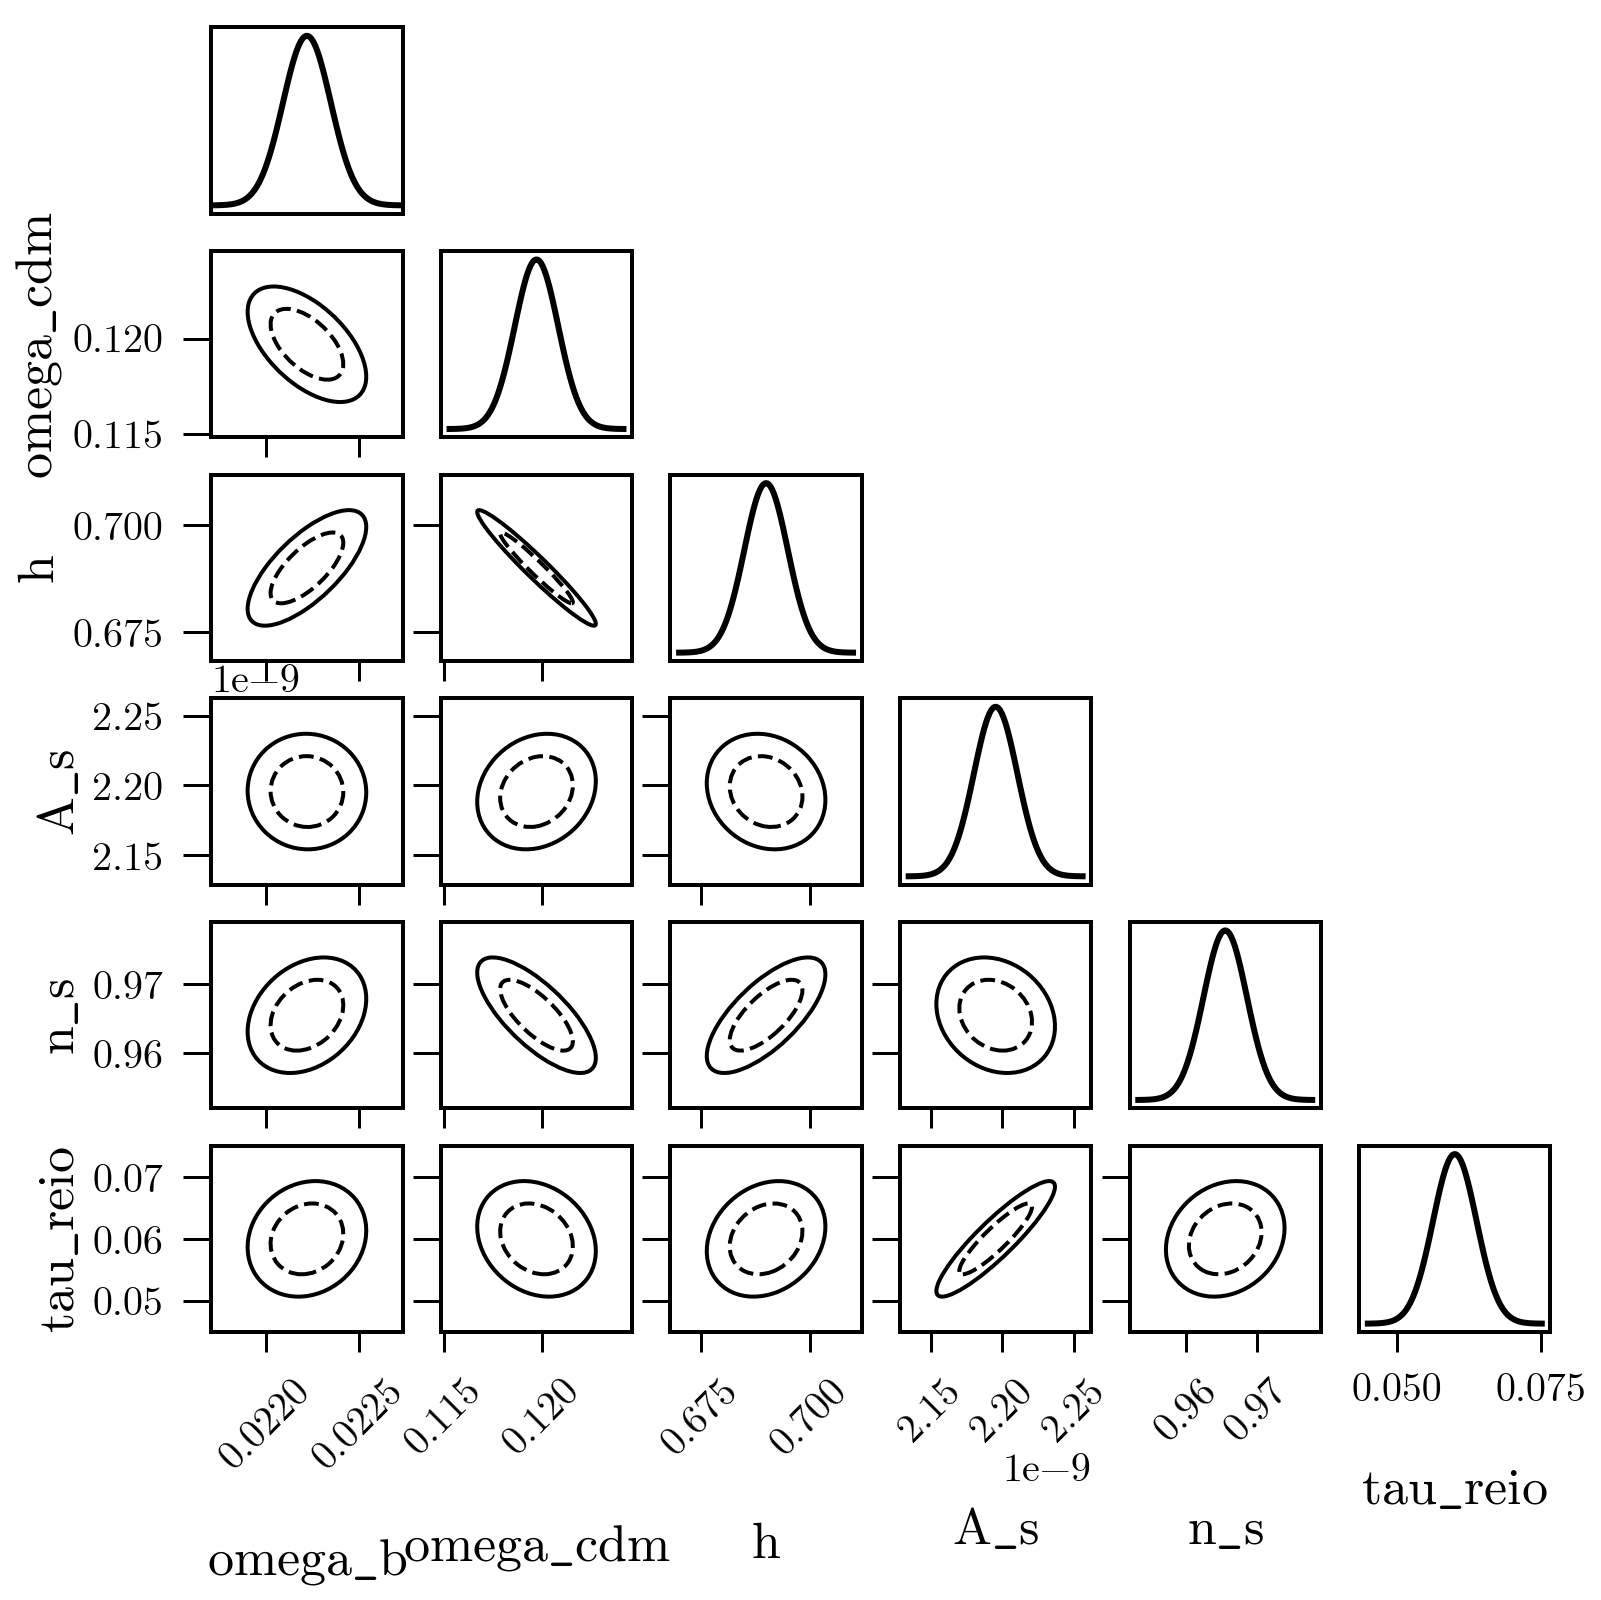

In [10]:
cov = np.linalg.inv(fisher)
fishchips.util.plot_triangle(obs, cov);

(1e-06, 10000.0)

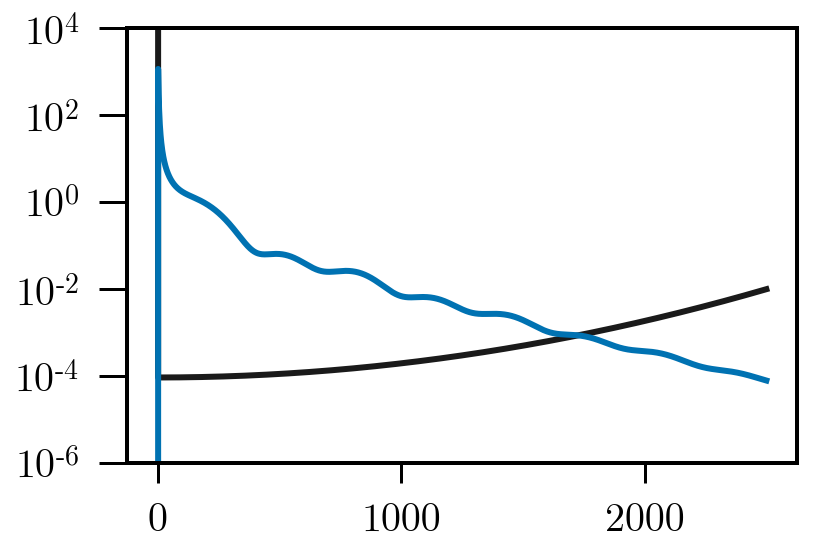

In [16]:
plt.plot(example_Planck.noise_T)
plt.plot(obs.cosmos['fiducial'].lensed_cl()['tt'] * (2.72*1e6)**2)
plt.yscale('log')
plt.ylim(1e-6,1e4)